In [25]:
#Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look a bit nicer
plt.style.use("seaborn-v0_8")
sns.set_theme()
# Install extra packages that Colab may not have or may be outdated
!pip install xgboost shap -q

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

import xgboost as xgb

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

import shap

# Initialize JS for interactive plots in notebooks
shap.initjs()

import warnings
warnings.filterwarnings("ignore")

# Show all columns when inspecting dataframes
pd.set_option("display.max_columns", None)



In [26]:
from google.colab import files
uploaded = files.upload()


Saving air quality health impact data.csv to air quality health impact data (1).csv


In [27]:
import pandas as pd

df = pd.read_csv("air quality health impact data.csv")
df.head()


,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621727,1.543378,46.851415,4.521422,10,2,0,100.000000,0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0


In [12]:
#Data cleaning
# Drop RecordID (not needed for ML)
df = df.drop(columns=['RecordID'], errors='ignore')

# Check for missing values
print("Missing values in each column:\n")
print(df.isnull().sum())

# Check duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()

# Basic statistical summary
df.describe()

Missing values in each column:

AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

Number of duplicate rows: 0


,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,499.858837,299.901962,199.984965,199.980195,99.969561,299.936811,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


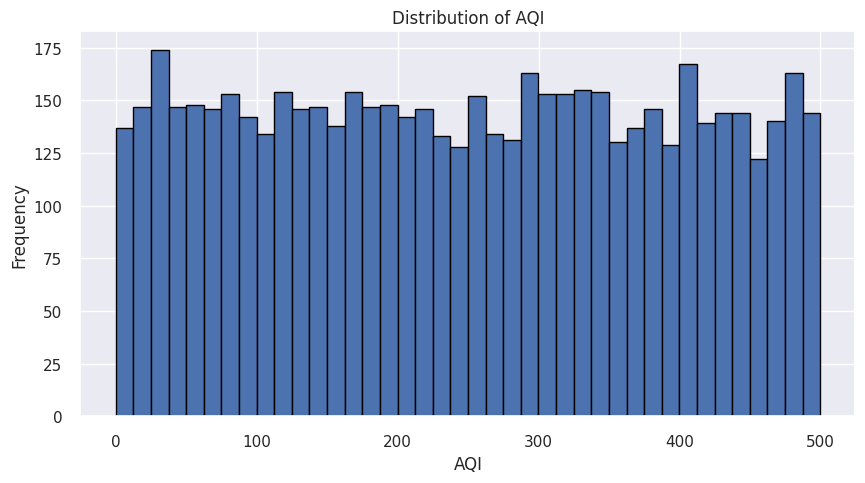

In [13]:

# EDA VISUALIZATION 1: Histogram
# Distribution of AQI


plt.figure(figsize=(10,5))
plt.hist(df["AQI"], bins=40, edgecolor='black')
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()


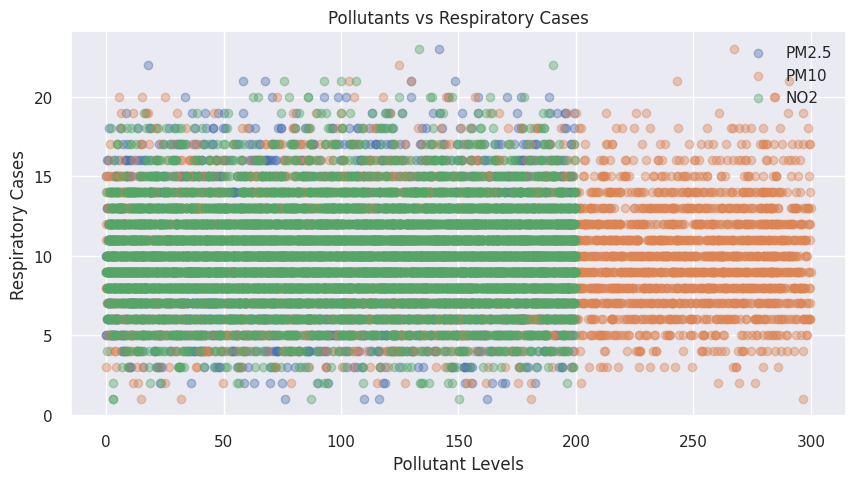

In [14]:

# VISUALIZATION 2
# Multi-Pollutant Comparison through Scatter plot


plt.figure(figsize=(10,5))

plt.scatter(df["PM2_5"], df["RespiratoryCases"], alpha=0.4, label="PM2.5")
plt.scatter(df["PM10"], df["RespiratoryCases"], alpha=0.4, label="PM10")
plt.scatter(df["NO2"], df["RespiratoryCases"], alpha=0.4, label="NO2")

plt.title("Pollutants vs Respiratory Cases")
plt.xlabel("Pollutant Levels")
plt.ylabel("Respiratory Cases")
plt.legend()
plt.show()



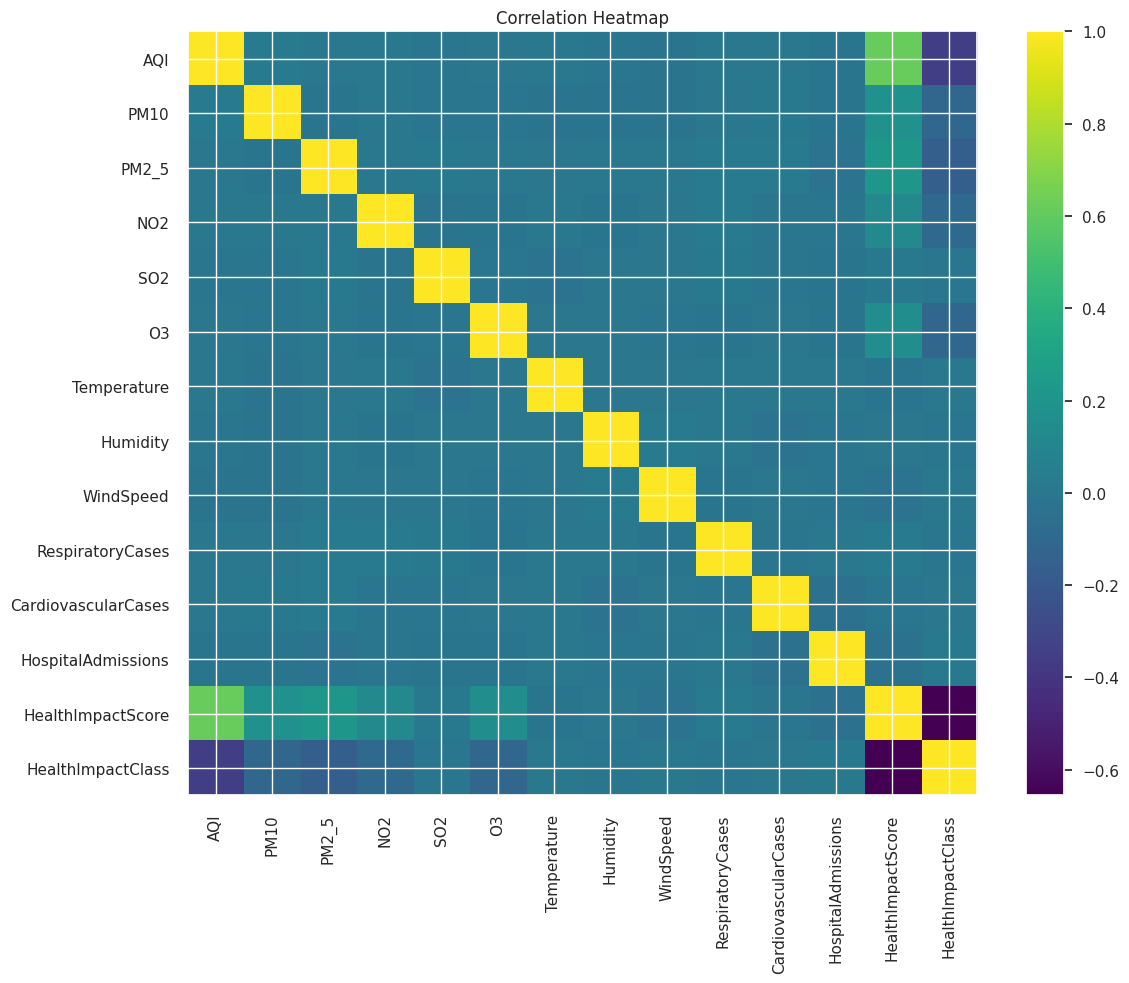

In [15]:

# EDA VISUALIZATION 3
# Correlation Heatmap


corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
plt.imshow(corr, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Correlation Heatmap")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.tight_layout()
plt.show()


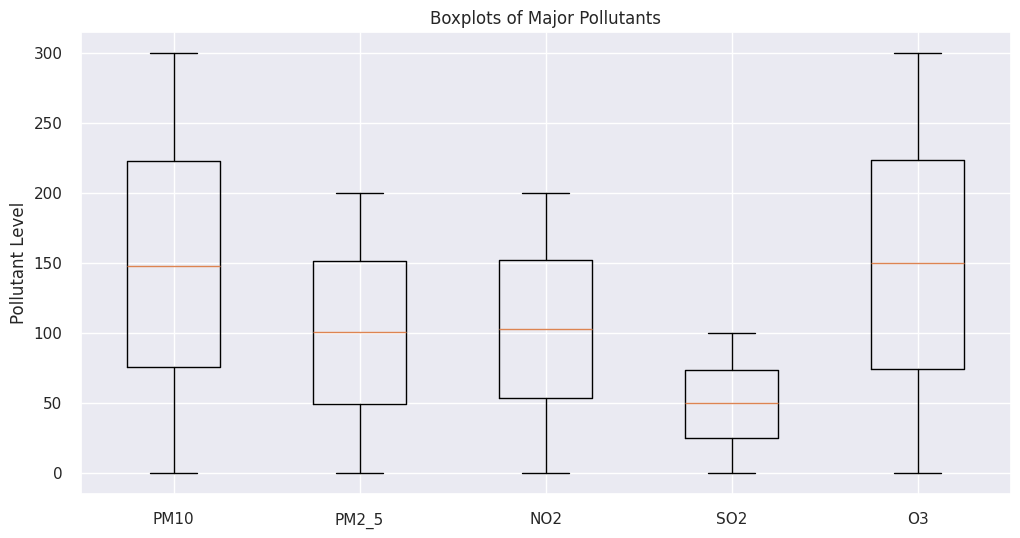

In [16]:

# VISUALIZATION 4
# Boxplots of Major Pollutants


pollutants = ["PM10", "PM2_5", "NO2", "SO2", "O3"]

plt.figure(figsize=(12,6))
plt.boxplot([df[p] for p in pollutants], labels=pollutants)
plt.title("Boxplots of Major Pollutants")
plt.ylabel("Pollutant Level")
plt.grid(True)
plt.show()


In [17]:
#DATA PRE PROCESSING + TRAIN/TEST SPLIT CODE

# PREPROCESSING STEP 1
# Define features (X) and targets (Y)

# drop RecordID if still present
df = df.drop(columns=['RecordID'], errors='ignore')

#the target variables (multi-output)
target_cols = ["RespiratoryCases", "CardiovascularCases"]

# Features = all columns except the targets
X = df.drop(columns=target_cols)
Y = df[target_cols]

print("Feature columns (X):", list(X.columns))
print("Target columns (Y):", list(Y.columns))


Feature columns (X): ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3', 'Temperature', 'Humidity', 'WindSpeed', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass']
Target columns (Y): ['RespiratoryCases', 'CardiovascularCases']


In [18]:
# PREPROCESSING STEP 2
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (4648, 12)
X_test shape: (1163, 12)
Y_train shape: (4648, 2)
Y_test shape: (1163, 2)


In [19]:
# PREPROCESSING STEP 3
# Scaling features (for MLP / NN models)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)

Scaled X_train shape: (4648, 12)
Scaled X_test shape: (1163, 12)


In [20]:
# MODEL 1: Multi-Output Random Forest Regressor
#Step 1 — Train Multi-Output Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# To create the model
rf_multi = RandomForestRegressor(
    n_estimators=200,      # number of trees
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

# To train the model on training data
rf_multi.fit(X_train, Y_train)

# To predict on test data
Y_pred_rf = rf_multi.predict(X_test)

# To convert predictions to a DataFrame for easier handling
Y_pred_rf_df = pd.DataFrame(Y_pred_rf, columns=Y_test.columns)

Y_pred_rf_df.head()

,RespiratoryCases,CardiovascularCases
0,9.64,4.870
1,10.32,4.815
2,9.74,4.195
3,10.19,5.210
4,9.52,4.895


In [21]:
#Step 2 — Evaluate the Random Forest (per target)
# EVALUATION for Random Forest (Multi-Output)

def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

for col in Y_test.columns:
    mae, rmse, r2 = regression_metrics(Y_test[col], Y_pred_rf_df[col])
    print(f"=== {col} ===")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}\n")

=== RespiratoryCases ===
MAE : 2.5667
RMSE: 3.2650
R²  : -0.0495

=== CardiovascularCases ===
MAE : 1.8351
RMSE: 2.3221
R²  : -0.0409



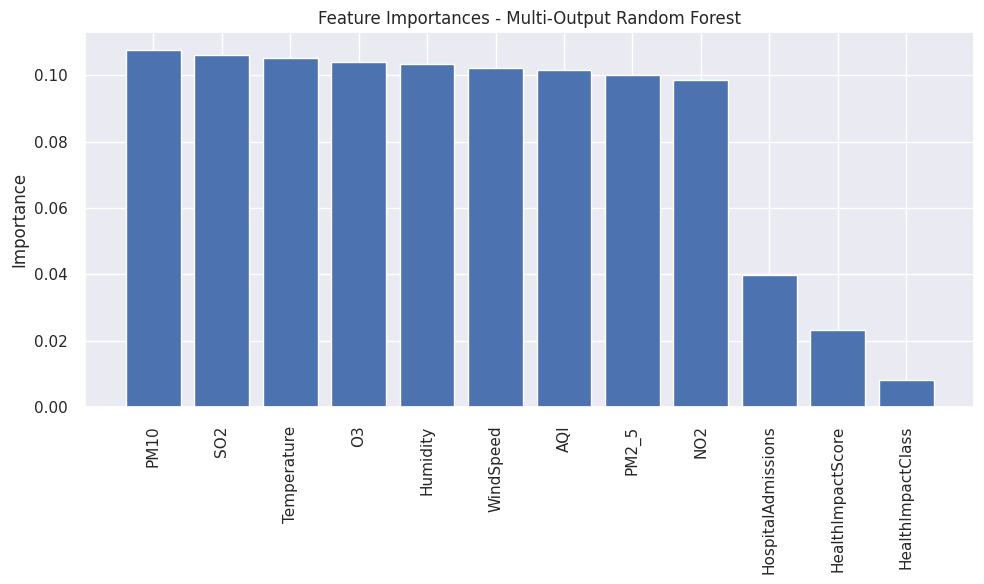

In [22]:
#Step 3 — Feature Importance Plot
import matplotlib.pyplot as plt
import numpy as np

importances = rf_multi.feature_importances_
feature_names = X_train.columns

# Sort by importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Feature Importances - Multi-Output Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [30]:
#Model 2: Multi-Output XGBoost

In [31]:
#Step 1 — Train Multi-Output XGBoost
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
import numpy as np

# Define base XGBoost regressor
xgb_base = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror',
    n_jobs=-1
)

# Wrap it in MultiOutputRegressor
xgb_multi = MultiOutputRegressor(xgb_base)

# Train
xgb_multi.fit(X_train, Y_train)

# Predict
Y_pred_xgb = xgb_multi.predict(X_test)

# Put predictions into DataFrame
Y_pred_xgb_df = pd.DataFrame(Y_pred_xgb, columns=Y_test.columns)
Y_pred_xgb_df.head()

,RespiratoryCases,CardiovascularCases
0,9.553655,4.660365
1,11.794803,4.718865
2,9.887551,4.237375
3,9.675941,5.191294
4,9.711708,4.153557


In [32]:
#Step 2 — Evaluate XGBoost (same metrics as RF)
# EVALUATION for XGBoost (Multi-Output)
for col in Y_test.columns:
    mae, rmse, r2 = regression_metrics(Y_test[col], Y_pred_xgb_df[col])
    print(f"=== {col} (XGBoost) ===")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}\n")

=== RespiratoryCases (XGBoost) ===
MAE : 2.5785
RMSE: 3.2814
R²  : -0.0601

=== CardiovascularCases (XGBoost) ===
MAE : 1.8518
RMSE: 2.3440
R²  : -0.0606



In [33]:
#Step 3 — Optional: Quick RF vs XGB comparison table
# COMPARISON: Random Forest vs XGBoost
models = {
    "RandomForest": Y_pred_rf_df,
    "XGBoost": Y_pred_xgb_df
}

comparison_rows = []

for model_name, preds in models.items():
    for col in Y_test.columns:
        mae, rmse, r2 = regression_metrics(Y_test[col], preds[col])
        comparison_rows.append({
            "Model": model_name,
            "Target": col,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2
        })

comparison_df = pd.DataFrame(comparison_rows)
comparison_df

,Model,Target,MAE,RMSE,R2
0,RandomForest,RespiratoryCases,2.566698,3.264974,-0.049455
1,RandomForest,CardiovascularCases,1.835069,2.322122,-0.040862
2,XGBoost,RespiratoryCases,2.578501,3.281432,-0.060061
3,XGBoost,CardiovascularCases,1.851850,2.343989,-0.060558


In [ ]:
#Model 3: Multi-Output Neural Network (MLP)

In [34]:
#Step 1 — Train Multi-Output MLPRegressor
# MODEL 3: Multi-Output Neural Network (MLPRegressor)

from sklearn.neural_network import MLPRegressor

mlp_multi = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # two hidden layers: 64 and 32 neurons
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    max_iter=300,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

# Train on SCALED features
mlp_multi.fit(X_train_scaled, Y_train)

# Predict on test set
Y_pred_mlp = mlp_multi.predict(X_test_scaled)

# Put predictions into a DataFrame
Y_pred_mlp_df = pd.DataFrame(Y_pred_mlp, columns=Y_test.columns)
Y_pred_mlp_df.head()

,RespiratoryCases,CardiovascularCases
0,10.136860,4.852991
1,10.527112,5.240437
2,9.583262,4.514778
3,10.775070,5.143457
4,9.670750,4.705244


In [35]:
#Step 2 — Evaluate the MLP (same metrics)
# EVALUATION for MLP (Multi-Output)
for col in Y_test.columns:
    mae, rmse, r2 = regression_metrics(Y_test[col], Y_pred_mlp_df[col])
    print(f"=== {col} (MLP) ===")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}\n")

=== RespiratoryCases (MLP) ===
MAE : 2.5807
RMSE: 3.2754
R²  : -0.0562

=== CardiovascularCases (MLP) ===
MAE : 1.8395
RMSE: 2.3265
R²  : -0.0448



In [36]:
#Step 3 - Optional: Add MLP to the comparison table
# ADD MLP TO COMPARISON TABLE

models = {
    "RandomForest": Y_pred_rf_df,
    "XGBoost": Y_pred_xgb_df,
    "MLP": Y_pred_mlp_df
}

comparison_rows = []

for model_name, preds in models.items():
    for col in Y_test.columns:
        mae, rmse, r2 = regression_metrics(Y_test[col], preds[col])
        comparison_rows.append({
            "Model": model_name,
            "Target": col,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2
        })

comparison_df = pd.DataFrame(comparison_rows)
comparison_df

,Model,Target,MAE,RMSE,R2
0,RandomForest,RespiratoryCases,2.566698,3.264974,-0.049455
1,RandomForest,CardiovascularCases,1.835069,2.322122,-0.040862
2,XGBoost,RespiratoryCases,2.578501,3.281432,-0.060061
3,XGBoost,CardiovascularCases,1.851850,2.343989,-0.060558
4,MLP,RespiratoryCases,2.580703,3.275450,-0.056200
5,MLP,CardiovascularCases,1.839529,2.326496,-0.044787


In [ ]:
#Train the two Single-Output Random Forest models
#(One for RespiratoryCases, one for CardiovascularCases)
#Because this addresses my research question:“Do multi-output models perform better than separate single-output models?”

In [37]:
#MODEL 4 — Random Forest for RespiratoryCases Only
#Step 1 — Train the model
#MODEL 4: Single-Output RF (RespiratoryCases)

from sklearn.ensemble import RandomForestRegressor

rf_resp = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train on X_train and only RespiratoryCases
rf_resp.fit(X_train, Y_train["RespiratoryCases"])

# Predict
resp_pred = rf_resp.predict(X_test)

In [38]:
#Step 2 — Evaluate the model
#EVALUATION: RF for RespiratoryCases Only

mae, rmse, r2 = regression_metrics(Y_test["RespiratoryCases"], resp_pred)

print("=== RespiratoryCases (Single-Output RF) ===")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}\n")

=== RespiratoryCases (Single-Output RF) ===
MAE : 2.5777
RMSE: 3.2615
R²  : -0.0472



In [39]:
#MODEL 5 — Random Forest for CardiovascularCases Only
#Step 1 — Train the model
# MODEL 5: Single-Output RF (CardiovascularCases)

rf_cardio = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train only on CardiovascularCases
rf_cardio.fit(X_train, Y_train["CardiovascularCases"])

# Predict
cardio_pred = rf_cardio.predict(X_test)

In [40]:
#Step 2 — Evaluate the model
# EVALUATION: RF for CardiovascularCases Only

mae, rmse, r2 = regression_metrics(Y_test["CardiovascularCases"], cardio_pred)

print("=== CardiovascularCases (Single-Output RF) ===")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}\n")

=== CardiovascularCases (Single-Output RF) ===
MAE : 1.8524
RMSE: 2.3312
R²  : -0.0490



In [ ]:
#Hyperparameter Tuning

In [ ]:
#using RandomizedSearchCV to tune only the Multi-Output Random Forest

In [41]:
#Step 1 — Import RandomizedSearchCV and define search space
# HYPERPARAMETER TUNING for Multi-Output Random Forest
# Using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the hyperparameter ranges:
# Parameter distributions for Random Forest
param_distributions = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

In [42]:
#Step 2 — Set up RandomizedSearchCV
# Base RF model (multi-output because Y_train has 2 columns)
rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# Randomized search
rf_random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_distributions,
    n_iter=30,                     # number of random combinations to try
    scoring="neg_mean_squared_error",
    cv=3,                          # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Run the search
rf_random_search.fit(X_train, Y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [43]:
#Step 3 — Check best hyperparameters
print("Best parameters found:")
print(rf_random_search.best_params_)

Best parameters found:
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}


In [44]:
#Step 4 — Evaluate the tuned RF model on the test set
# Best model from search
rf_multi_tuned = rf_random_search.best_estimator_

# Predict on test data
Y_pred_rf_tuned = rf_multi_tuned.predict(X_test)

# Put into DataFrame
Y_pred_rf_tuned_df = pd.DataFrame(Y_pred_rf_tuned, columns=Y_test.columns)

# Evaluate per target
for col in Y_test.columns:
    mae, rmse, r2 = regression_metrics(Y_test[col], Y_pred_rf_tuned_df[col])
    print(f"=== {col} (TUNED Random Forest) ===")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}\n")

=== RespiratoryCases (TUNED Random Forest) ===
MAE : 2.4996
RMSE: 3.1918
R²  : -0.0029

=== CardiovascularCases (TUNED Random Forest) ===
MAE : 1.7721
RMSE: 2.2786
R²  : -0.0022



In [45]:
#Step 5 — Optional: Compare baseline RF vs tuned RF
# COMPARISON: Baseline RF vs Tuned RF

models = {
    "RF_Baseline": Y_pred_rf_df,
    "RF_Tuned": Y_pred_rf_tuned_df
}

rows = []

for name, preds in models.items():
    for col in Y_test.columns:
        mae, rmse, r2 = regression_metrics(Y_test[col], preds[col])
        rows.append({
            "Model": name,
            "Target": col,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2
        })

rf_compare_df = pd.DataFrame(rows)
rf_compare_df

,Model,Target,MAE,RMSE,R2
0,RF_Baseline,RespiratoryCases,2.566698,3.264974,-0.049455
1,RF_Baseline,CardiovascularCases,1.835069,2.322122,-0.040862
2,RF_Tuned,RespiratoryCases,2.499610,3.191751,-0.002911
3,RF_Tuned,CardiovascularCases,1.772083,2.278595,-0.002207


In [46]:
#Hyperparameter tuning using RandomizedSearchCV substantially improved the performance of the Multi-Output Random Forest.
#MAE and RMSE decreased for both health outcomes, and R² values increased from approximately –0.05 to nearly 0, indicating that the tuned model captured more variance in the targets.
#Although the R² remains close to zero, the improvement demonstrates that parameter optimization enhances model performance even when the underlying relationships in the dataset are weak.

In [ ]:
#Plots for the the Actual vs Predicted plots for Tuned RF

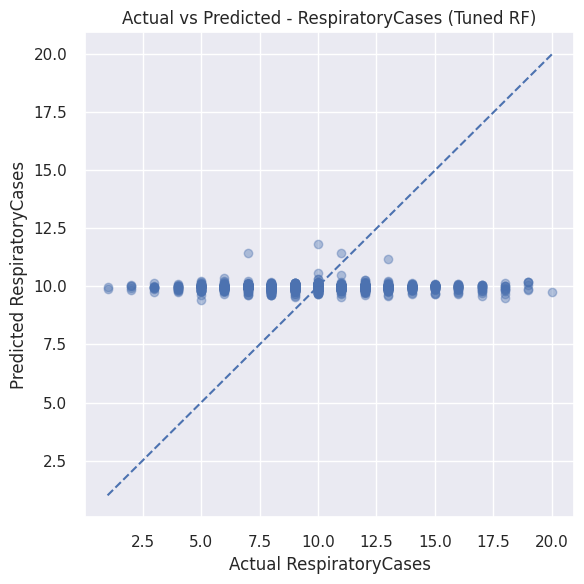

In [47]:
#Step 1 — Single plots for each target
#RespiratoryCases: Actual vs Predicted
import matplotlib.pyplot as plt
import numpy as np

# Ensure we have the tuned predictions
# Y_test  -> true values (DataFrame)
# Y_pred_rf_tuned_df -> predicted values (DataFrame)

# RespiratoryCases
y_true_resp = Y_test["RespiratoryCases"]
y_pred_resp = Y_pred_rf_tuned_df["RespiratoryCases"]

plt.figure(figsize=(6,6))
plt.scatter(y_true_resp, y_pred_resp, alpha=0.4)
plt.plot([y_true_resp.min(), y_true_resp.max()],
         [y_true_resp.min(), y_true_resp.max()],
         linestyle="--")
plt.title("Actual vs Predicted - RespiratoryCases (Tuned RF)")
plt.xlabel("Actual RespiratoryCases")
plt.ylabel("Predicted RespiratoryCases")
plt.tight_layout()
plt.show()

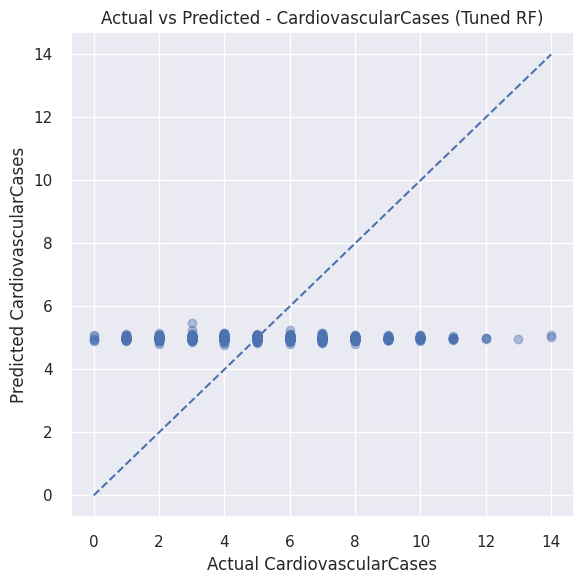

In [48]:
#CardiovascularCases: Actual vs Predicted
# CardiovascularCases
y_true_cardio = Y_test["CardiovascularCases"]
y_pred_cardio = Y_pred_rf_tuned_df["CardiovascularCases"]

plt.figure(figsize=(6,6))
plt.scatter(y_true_cardio, y_pred_cardio, alpha=0.4)
plt.plot([y_true_cardio.min(), y_true_cardio.max()],
         [y_true_cardio.min(), y_true_cardio.max()],
         linestyle="--")
plt.title("Actual vs Predicted - CardiovascularCases (Tuned RF)")
plt.xlabel("Actual CardiovascularCases")
plt.ylabel("Predicted CardiovascularCases")
plt.tight_layout()
plt.show()

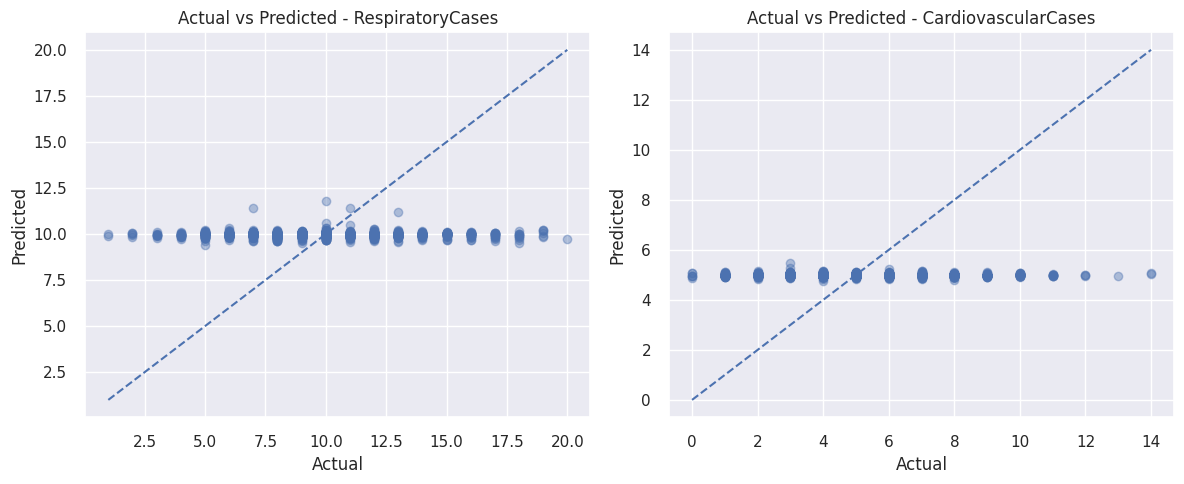

In [49]:
#Step 2 — Side-by-side figure(Same plots as above but side by side)
plt.figure(figsize=(12,5))

# Subplot 1: Respiratory
plt.subplot(1, 2, 1)
plt.scatter(y_true_resp, y_pred_resp, alpha=0.4)
plt.plot([y_true_resp.min(), y_true_resp.max()],
         [y_true_resp.min(), y_true_resp.max()],
         linestyle="--")
plt.title("Actual vs Predicted - RespiratoryCases")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Subplot 2: Cardiovascular
plt.subplot(1, 2, 2)
plt.scatter(y_true_cardio, y_pred_cardio, alpha=0.4)
plt.plot([y_true_cardio.min(), y_true_cardio.max()],
         [y_true_cardio.min(), y_true_cardio.max()],
         linestyle="--")
plt.title("Actual vs Predicted - CardiovascularCases")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()